<h1 style = 'color:Green;background-color:white;border-radius:2%'> Model Evaluation and Refinement</h1>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(url)

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
# remove the columns 'Unnamed:0.1' and 'Unnamed:0' since they do not provide any value to the models.

df.drop(['Unnamed: 0.1','Unnamed: 0'],axis = 1,inplace = True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [54]:
# Functions for Plotting
def  DistributionPlot(RedFunction, BlueFunction ,RedName,BlueName,Title):
    width = 12
    height = 10
    plt.figure(figsize = (width,height))

    ax1 = sns.distplot(RedFunction,color='r',hist=False,label = RedName)
    ax2 = sns.distplot(BlueFunction,color = 'b',hist=False,label= BlueName,ax = ax1)

    plt.title(Title)
    plt.xlabel('Price(in dollars)')
    plt.ylabel('Proporion of cars')
    plt.legend()
    plt.show()
    plt.close()

In [ ]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

#### Training and Testing

In [ ]:
y_data = df['price']

In [ ]:
x_data = df.drop(['price'],axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.1,random_state=1)

print('number of test samples :',x_test.shape[0])
print('number of training samples:',x_train.shape[0])

number of test samples : 21
number of training samples: 180


In [ ]:
df.shape[0]

201

In [ ]:
from sklearn.model_selection import  train_test_split
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_data,y_data,test_size=0.4,random_state=0)

print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [ ]:
from sklearn.linear_model import LinearRegression

lre = LinearRegression()
lre.fit(x_train[['horsepower']],y_train)

LinearRegression()

In [ ]:
lre.score(x_test[['horsepower']],y_test)

0.36358755750788263

In [ ]:
lre.score(x_train[['horsepower']],y_train)

0.6619724197515104

In [34]:
lre1 = LinearRegression()
lre1.fit(x_train1[['horsepower']],y_train1)

LinearRegression()

In [36]:
lre1.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

In [37]:
lre1.score(x_train1[['horsepower']],y_train1)

0.5754067463583004

#### Cross-Validation Score

In [38]:
from sklearn.model_selection import cross_val_score

Rcross = cross_val_score(lre,x_train[['horsepower']],y_train,cv = 4)

In [39]:
Rcross

array([0.67029907, 0.67895595, 0.69498384, 0.57101086])

In [40]:
print("the mean of the folds are ",np.mean(Rcross)," and the standard deviation is ",Rcross.std())

the mean of the folds are  0.65381242843476  and the standard deviation is  0.04861890320708136


In [41]:
# We can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.

-1*cross_val_score(lre,x_data[['horsepower']],y_data,cv = 4, scoring = 'neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.7224759 ])

In [43]:
rcv = cross_val_score(lre,x_data[['horsepower']],y_data,cv = 2)

rcv.mean()

np.float64(0.5166761697127429)

In [46]:
# use the function 'cross_val_predict' to predict the output.

from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(lre,x_data[['horsepower']],y_data,cv = 4)
y_pred[0:4]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306])

#### Overfitting, Underfitting and Model Selection

In [47]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_train)

LinearRegression()

In [50]:
#Prediction using training data:
y_pred_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
y_pred_train[:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [52]:
# Prediction using test data:
y_pred_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
y_pred_test[:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

C:\Users\pavan b\AppData\Local\Temp\ipykernel_11456\2974564166.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction,color='r',hist=False,label = RedName)
C:\Users\pavan b\AppData\Local\Temp\ipykernel_11456\2974564166.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 =

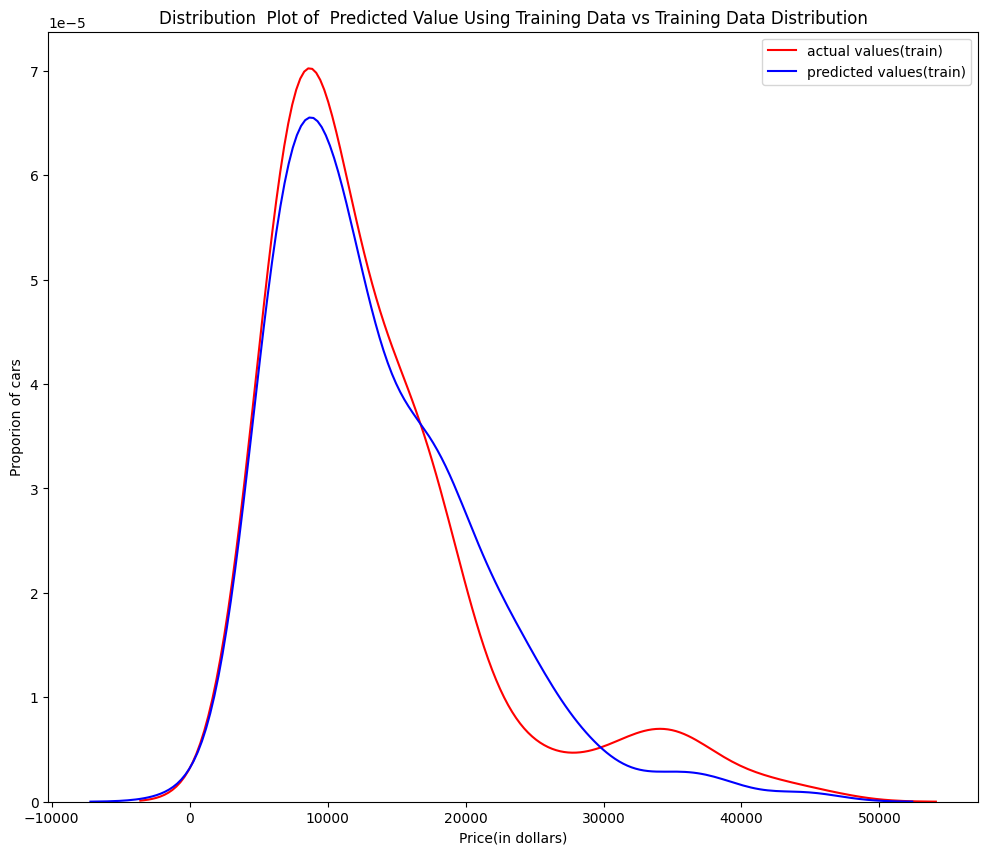

In [55]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train,y_pred_train,'actual values(train)','predicted values(train)',Title)

C:\Users\pavan b\AppData\Local\Temp\ipykernel_11456\2974564166.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction,color='r',hist=False,label = RedName)
C:\Users\pavan b\AppData\Local\Temp\ipykernel_11456\2974564166.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 =

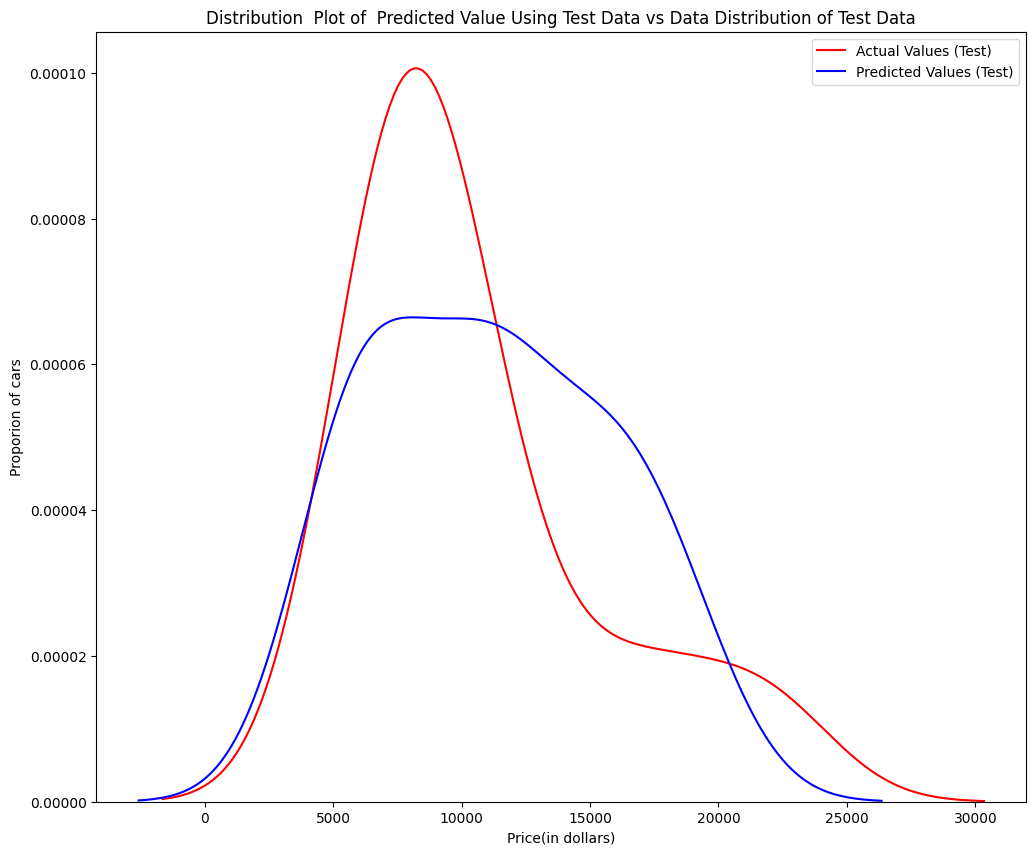

In [56]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,y_pred_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [57]:
from sklearn.preprocessing import PolynomialFeatures

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,random_state=0,test_size=0.45)

In [67]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [68]:
poly  =  LinearRegression()
poly.fit(x_train_pr,y_train)

LinearRegression()

In [69]:
y_pred = poly.predict(x_test_pr)
y_pred[:5]

array([ 6728.65566037,  7307.9878638 , 12213.7877412 , 18893.24796457,
       19995.95185894])

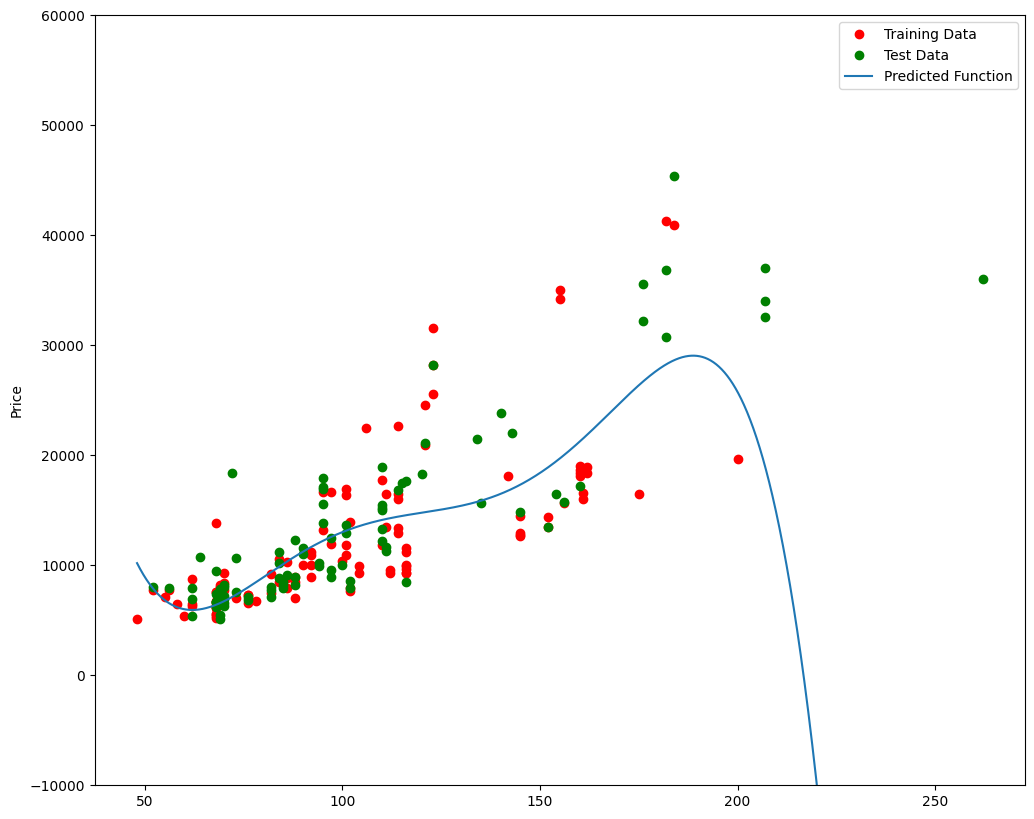

In [70]:

PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [72]:
poly.score(x_train_pr,y_train)

0.5567716902121724

In [73]:
y_test.shape

(91,)

In [74]:
x_test_pr.shape

(91, 6)

In [75]:
poly.score(x_test_pr,y_test)

-29.87134054062532

Text(3, 0.75, 'maximum R^2')

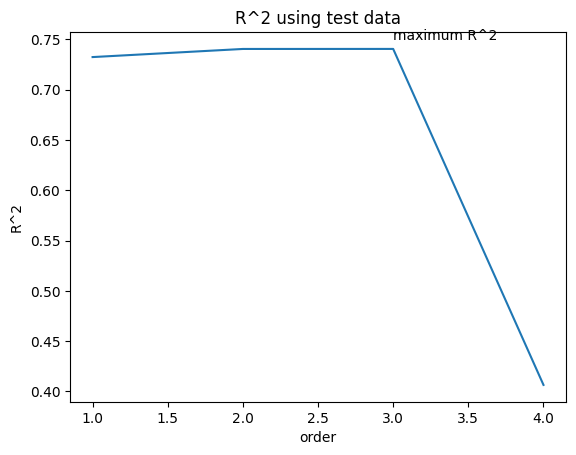

In [82]:
rsqu_test = []
order = [1,2,3,4]

for n in order:
    poly = PolynomialFeatures(degree=n)
    x_train_pr = poly.fit_transform(x_train[['horsepower']])
    x_test_pr = poly.fit_transform(x_test[['horsepower']])

    lr = LinearRegression()
    lr.fit(x_train_pr,y_train)
    rsqu_test.append(lr.score(x_test_pr,y_test))

plt.plot(order,rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 using test data')
plt.text(3,0.75,'maximum R^2')

In [83]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [84]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

NameError: name 'interact' is not defined

In [86]:
pr1 = PolynomialFeatures(degree=2)
x_train_pr1 = pr1.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])

x_train_pr1.shape[0]

110

C:\Users\pavan b\AppData\Local\Temp\ipykernel_11456\2974564166.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction,color='r',hist=False,label = RedName)
C:\Users\pavan b\AppData\Local\Temp\ipykernel_11456\2974564166.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 =

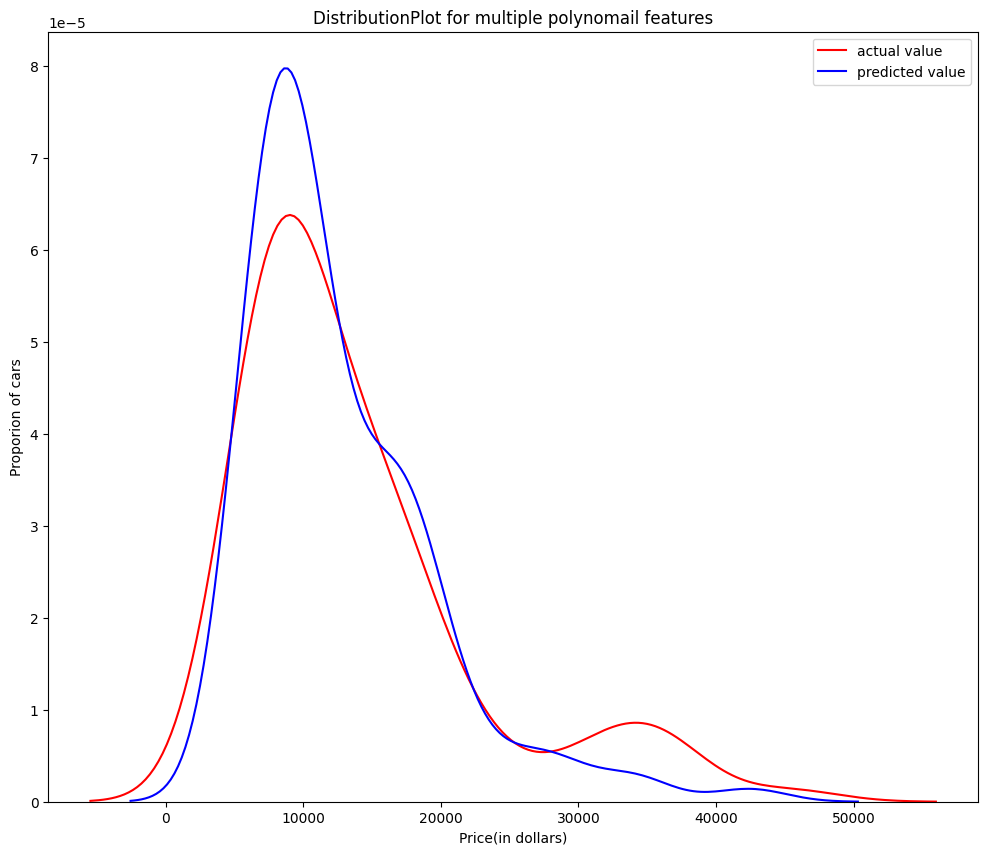

In [91]:
lr = LinearRegression()
lr.fit(x_train_pr1,y_train)
y_pred_lr1 = lr.predict(x_train_pr1)

DistributionPlot(y_test,y_pred_lr1,'actual value','predicted value','DistributionPlot for multiple polynomail features')

#### Ridge Regression

In [92]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [93]:
from sklearn.linear_model import Ridge

In [94]:
RidgeModel = Ridge(alpha = 1)
RidgeModel.fit(x_train_pr,y_train)
y_pred = RidgeModel.predict(x_test_pr)
y_pred[0:4]

array([ 6570.82441941,  9636.24891471, 20949.92322737, 19403.60313256])

In [96]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.Collecting tqdm




[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [97]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

  0%|          | 0/1000 [00:00<?, ?it/s, Test Score=0.548, Train Score=0.868]

100%|██████████| 1000/1000 [00:06<00:00, 155.00it/s, Test Score=0.564, Train Score=0.859]


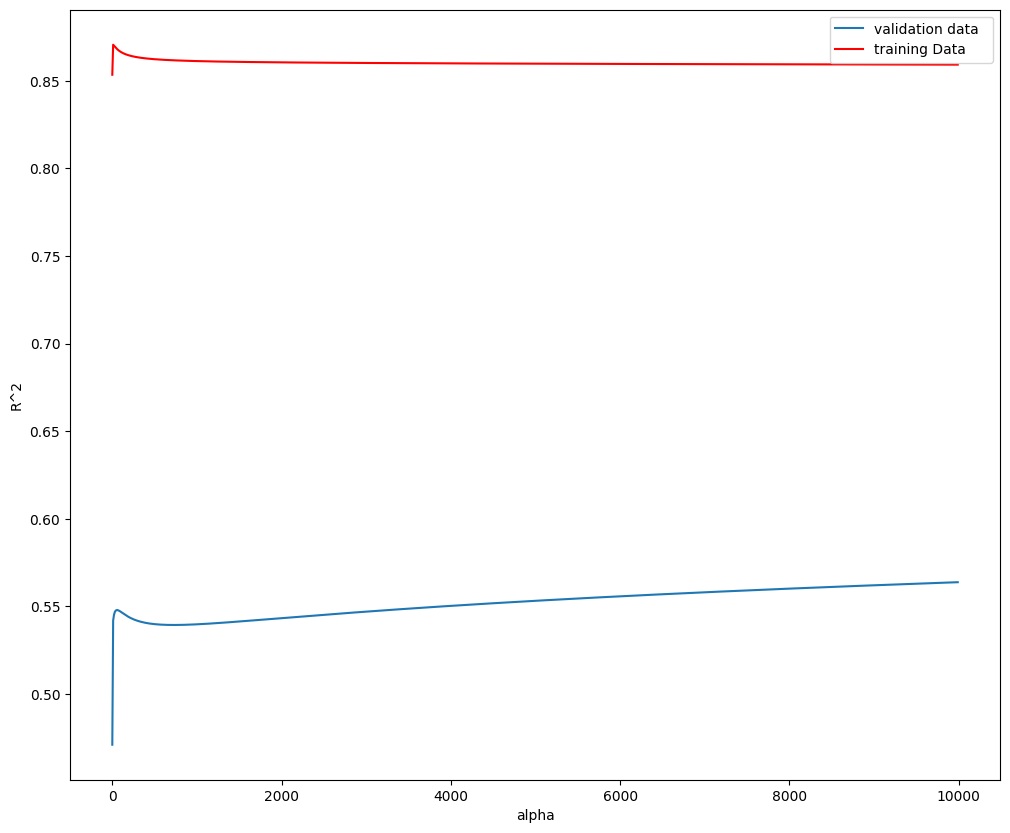

In [98]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [99]:
RidgeModel = Ridge(alpha = 10)
RidgeModel.fit(x_train_pr,y_train)
RidgeModel.score(x_test_pr,y_test)

0.5418576440206506

#### Grid Search

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
parameters1 = [{'alpha':[0.001,0.1,1,10,100,1000,10000,100000,1000000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]

In [105]:
RR = Ridge()
RR

Ridge()

In [106]:
grid1 = GridSearchCV(RR,parameters1,cv = 4)
grid1

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000]}])

In [110]:
grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000]}])

In [112]:
BestRR = grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [113]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036152

In [114]:
parameters2 = {'alpha':[0.001,0.1,1,10,100,1000,10000,100000,1000000]}

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

grid2 = GridSearchCV(Ridge(),parameters2,cv=4)
grid2.fit(x_scaled,y_data)

best_ridge_model = grid2.best_estimator_
best_alpha = grid2.best_params_['alpha']
best_alpha

100

In [116]:
best_ridge_model

Ridge(alpha=100)